In [1]:
import pandas                           as      pd
import numpy                            as      np
from matplotlib                         import  pyplot as plt
from sklearn                            import  metrics

from statsmodels.tsa.seasonal           import  seasonal_decompose

import statsmodels.tools.eval_measures  as      em
from   sklearn.metrics                  import  mean_squared_error
from   statsmodels.tsa.api              import  ExponentialSmoothing, SimpleExpSmoothing, Holt
import warnings
warnings.filterwarnings("ignore")

In [2]:
rd = pd.read_csv(r'../data/Emission.csv',parse_dates=['Year-Month'], index_col='Year-Month'); rd.head()

,CO2 Emission
Year-Month,
1973-01-01,106.363
1973-02-01,101.760
1973-03-01,110.553
1973-04-01,104.734
1973-05-01,114.897


In [3]:
rd.describe()

,CO2 Emission
count,486.000000
mean,136.958300
std,19.856571
min,94.699000
25%,118.778500
50%,135.994000
75%,154.219500
max,179.659000


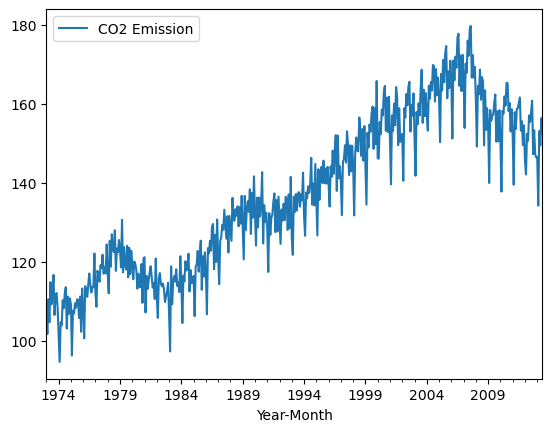

In [4]:
rd.plot(); plt.show()

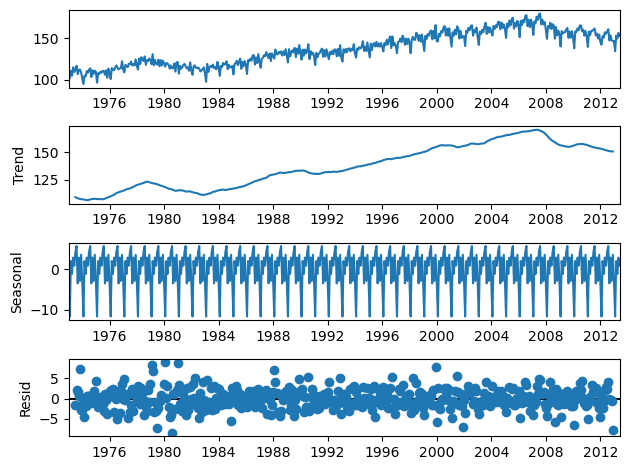

In [5]:
df_add_dcmps = seasonal_decompose(rd, model='additive')
df_add_dcmps.plot(); plt.show()

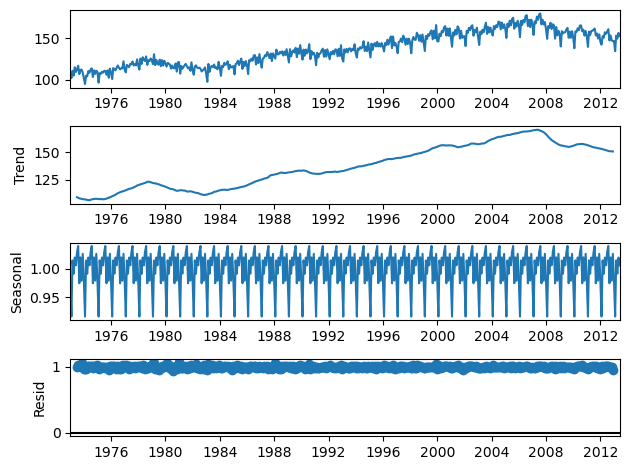

In [6]:
df_mult_dcmps = seasonal_decompose(rd, model='multiplicative')
df_mult_dcmps.plot(); plt.show()

In [7]:
train = rd[0:int(len(rd)*0.8)]
test = rd[int(len(rd)*0.8):]

In [8]:
test.shape[0]/rd.shape[0]

0.20164609053497942

In [9]:
rd.shape

(486, 1)

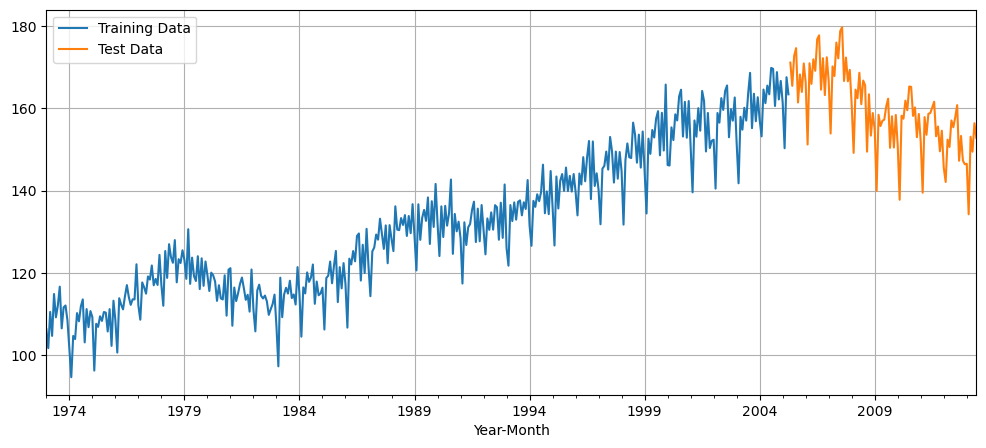

In [10]:
fig, axes = plt.subplots(1,1,figsize=(12,5))

train['CO2 Emission'].plot(fontsize=10)
test['CO2 Emission'].plot(fontsize=10)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

## Naive Model

In [11]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [12]:
NaiveModel_test['naive'] = np.asarray(train['CO2 Emission'])[len(np.asarray(train['CO2 Emission']))-1]
NaiveModel_test['naive'].head()

Year-Month
2005-05-01    163.376
2005-06-01    163.376
2005-07-01    163.376
2005-08-01    163.376
2005-09-01    163.376
Name: naive, dtype: float64

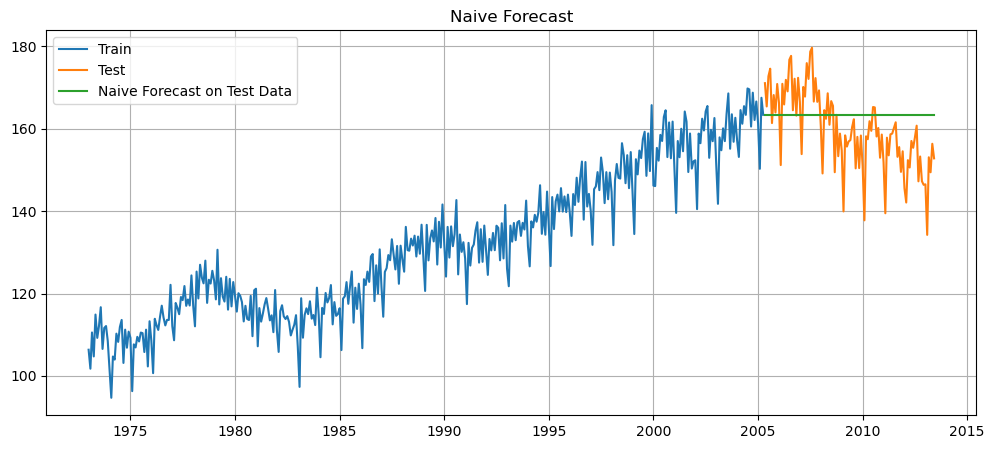

In [13]:
fig, axes = plt.subplots(1,1,figsize=(12,5))
plt.plot(NaiveModel_train['CO2 Emission'], label='Train')
plt.plot(test['CO2 Emission'], label='Test')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid(); plt.show()

In [14]:
rmse_model2_test = metrics.mean_squared_error(test['CO2 Emission'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 10.159


In [15]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

#resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,Test RMSE
NaiveModel,10.159476


## Simple average

In [16]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [17]:
SimpleAverage_test['mean_forecast'] = train['CO2 Emission'].mean()
SimpleAverage_test['mean_forecast'].head()

Year-Month
2005-05-01    131.228523
2005-06-01    131.228523
2005-07-01    131.228523
2005-08-01    131.228523
2005-09-01    131.228523
Name: mean_forecast, dtype: float64

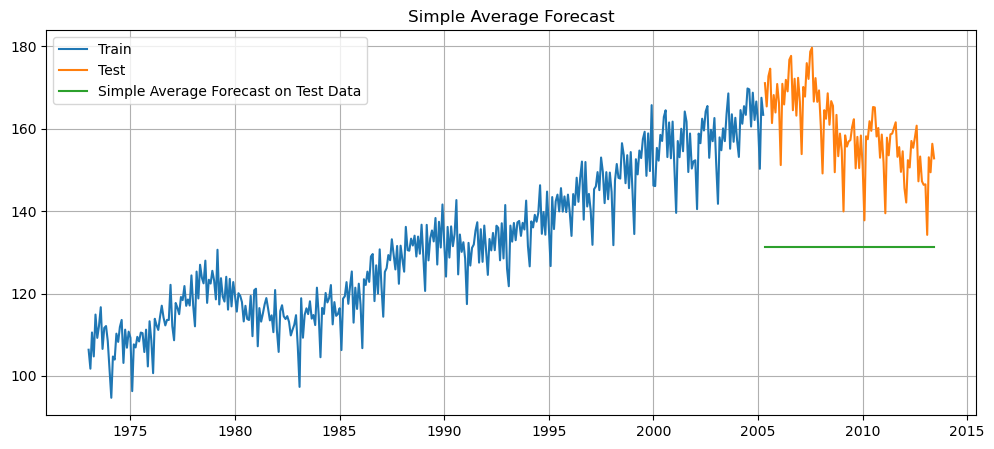

In [18]:
fig, axes = plt.subplots(1,1,figsize=(12,5))
plt.plot(SimpleAverage_train['CO2 Emission'], label='Train')
plt.plot(test['CO2 Emission'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average Forecast on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid(); plt.show()

In [19]:
rmse_model2_test = metrics.mean_squared_error(test['CO2 Emission'],SimpleAverage_test['mean_forecast'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 29.945


In [20]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['SimpleAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,Test RMSE
NaiveModel,10.159476
SimpleAverage,29.944898


## Moving Average

In [21]:
MovingAverage = rd.copy()

In [22]:
MovingAverage['Trailing_2'] = MovingAverage['CO2 Emission'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['CO2 Emission'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['CO2 Emission'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['CO2 Emission'].rolling(9).mean()
MovingAverage.head(10)

,CO2 Emission,Trailing_2,Trailing_4,Trailing_6,Trailing_9
Year-Month,,,,,
1973-01-01,106.363,NaN,NaN,NaN,NaN
1973-02-01,101.760,104.0615,NaN,NaN,NaN
1973-03-01,110.553,106.1565,NaN,NaN,NaN
1973-04-01,104.734,107.6435,105.85250,NaN,NaN
1973-05-01,114.897,109.8155,107.98600,NaN,NaN
1973-06-01,109.240,112.0685,109.85600,107.924500,NaN
1973-07-01,112.139,110.6895,110.25250,108.887167,NaN
1973-08-01,116.683,114.4110,113.23975,111.374333,NaN
1973-09-01,106.558,111.6205,111.15500,110.708500,109.214111


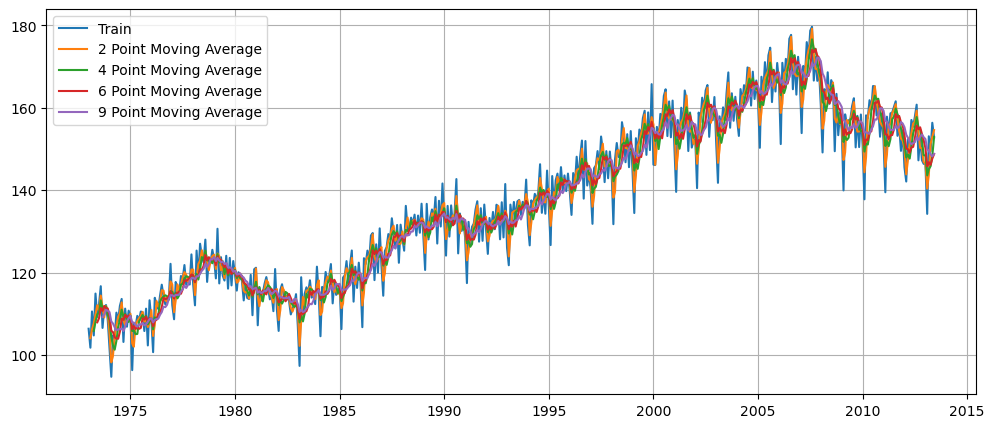

In [23]:
## Plotting on the whole data
fig, axes = plt.subplots(1,1,figsize=(12,5))
plt.plot(MovingAverage['CO2 Emission'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid(); plt.show()

In [24]:
trailing_MovingAverage_train=MovingAverage[0:int(len(MovingAverage)*0.8)] 
trailing_MovingAverage_test=MovingAverage[int(len(MovingAverage)*0.8):]

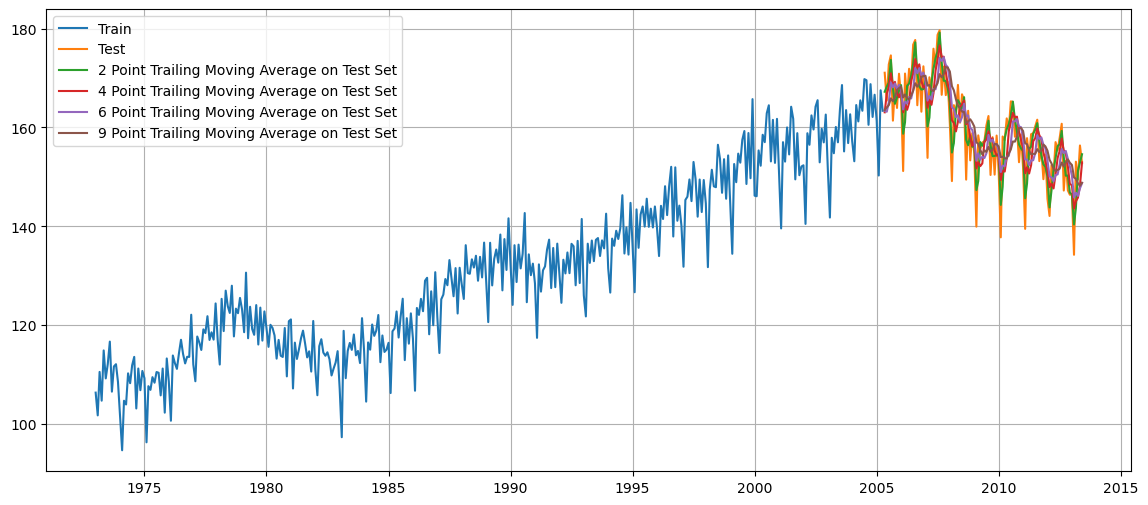

In [25]:
plt.figure(figsize=(14,6))
plt.plot(trailing_MovingAverage_train['CO2 Emission'], label='Train')
plt.plot(trailing_MovingAverage_test['CO2 Emission'], label='Test')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid(); plt.show()

In [26]:
## Test Data - RMSE  --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['CO2 Emission'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['CO2 Emission'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['CO2 Emission'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['CO2 Emission'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 4.276
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 5.381
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 6.097
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 6.805


In [27]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,Test RMSE
NaiveModel,10.159476
SimpleAverage,29.944898
2pointTrailingMovingAverage,4.276399
4pointTrailingMovingAverage,5.381189
6pointTrailingMovingAverage,6.096596
9pointTrailingMovingAverage,6.804840


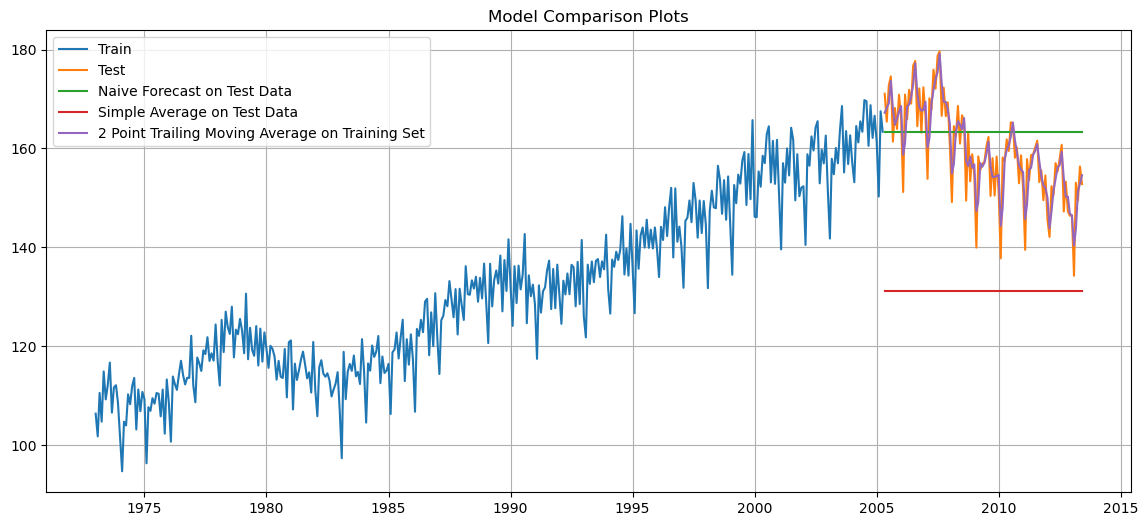

In [28]:
plt.figure(figsize=(14,6))
plt.plot(train['CO2 Emission'], label='Train')
plt.plot(test['CO2 Emission'], label='Test')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid(); plt.show()

# SES - ETS(A, N, N) - Simple Exponential Smoothing with additive errors

In [29]:
model_SES = SimpleExpSmoothing(train)
model_SES_autofit = model_SES.fit(optimized=True)
model_SES_autofit.params

{'smoothing_level': 0.17841106804505155,
 'smoothing_slope': nan,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 107.89425637093807,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [30]:
SES_predict = model_SES_autofit.forecast(steps=len(test))
SES_predict

2005-05-01    162.6717
2005-06-01    162.6717
2005-07-01    162.6717
2005-08-01    162.6717
2005-09-01    162.6717
                ...   
2013-02-01    162.6717
2013-03-01    162.6717
2013-04-01    162.6717
2013-05-01    162.6717
2013-06-01    162.6717
Freq: MS, Length: 98, dtype: float64

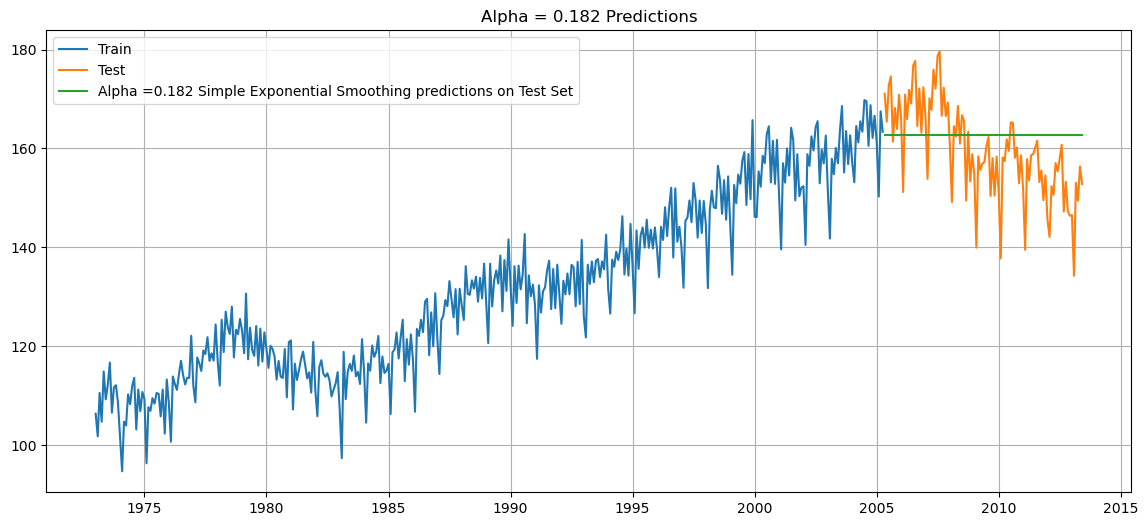

In [31]:
plt.figure(figsize=(14,6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha =0.182 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.182 Predictions'); plt.show()

In [32]:
def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [33]:
print('SES RMSE:',mean_squared_error(test.values,SES_predict.values,squared=False))
print('SES RMSE (calculated using statsmodels):',em.rmse(test.values,SES_predict.values)[0])

SES RMSE: 9.922370664614252
SES RMSE (calculated using statsmodels): 9.922370664614252


In [34]:
resultsDf_tmp = pd.DataFrame({'Test RMSE': [em.rmse(test.values,SES_predict.values)[0]]},index=['Alpha=0.182,SES'])
resultsDf = pd.concat([resultsDf, resultsDf_tmp])
resultsDf

,Test RMSE
NaiveModel,10.159476
SimpleAverage,29.944898
2pointTrailingMovingAverage,4.276399
4pointTrailingMovingAverage,5.381189
6pointTrailingMovingAverage,6.096596
9pointTrailingMovingAverage,6.804840
"Alpha=0.182,SES",9.922371


# Holt - ETS(A, A, N) - Holt's linear method with additive errors

In [35]:
model_DES = Holt(train)
model_DES = model_DES.fit()

print('')
print('==Holt model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_DES.params)
DES_predict =  model_DES.forecast(len(test))
DES_predict


==Holt model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.1138005430044836, 'smoothing_slope': 0.11380024712349843, 'smoothing_seasonal': nan, 'damping_slope': nan, 'initial_level': 108.3335846906535, 'initial_slope': 0.0, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


2005-05-01    165.036105
2005-06-01    165.270499
2005-07-01    165.504892
2005-08-01    165.739286
2005-09-01    165.973679
                 ...    
2013-02-01    186.834702
2013-03-01    187.069095
2013-04-01    187.303489
2013-05-01    187.537882
2013-06-01    187.772276
Freq: MS, Length: 98, dtype: float64

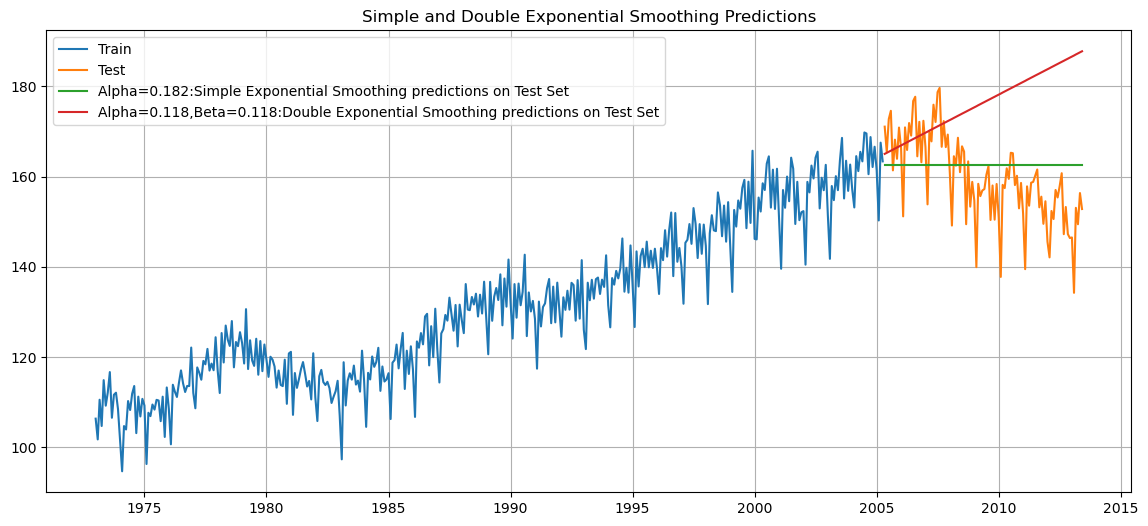

In [36]:
plt.figure(figsize=(14,6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.182:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.118,Beta=0.118:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions'); plt.show()

In [37]:
print('DES RMSE:',mean_squared_error(test.values,DES_predict.values,squared=False))
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,DES_predict.values,squared=False)]}
                           ,index=['Alpha=0.118,Beta=0.118:DES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

DES RMSE: 22.372481740233436


,Test RMSE
NaiveModel,10.159476
SimpleAverage,29.944898
2pointTrailingMovingAverage,4.276399
4pointTrailingMovingAverage,5.381189
6pointTrailingMovingAverage,6.096596
9pointTrailingMovingAverage,6.804840
"Alpha=0.182,SES",9.922371
"Alpha=0.118,Beta=0.118:DES",22.372482


# Holt-Winters - ETS(A, A, A) - Holt Winter's linear method with additive errors

In [38]:
model_TES = ExponentialSmoothing(train,trend='additive',seasonal='additive')
# Fitting the model
model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.2738685184108169, 'smoothing_slope': 2.552526961426553e-18, 'smoothing_seasonal': 0.10462453591507656, 'damping_slope': nan, 'initial_level': 127.47508946035425, 'initial_slope': 0.14442563856045082, 'initial_seasons': array([-20.73876114, -27.86527457, -16.49802692, -20.10233899,
       -16.43772786, -18.09792337, -16.38857226, -14.98575179,
       -22.22229148, -17.13665258, -21.0309528 , -15.12327991]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [39]:
# Forecasting using this model for the duration of the test set
TES_predict =  model_TES.forecast(len(test))
TES_predict

2005-05-01    168.232813
2005-06-01    165.679225
2005-07-01    170.435119
2005-08-01    171.324219
2005-09-01    161.065136
                 ...    
2013-02-01    166.027071
2013-03-01    180.689076
2013-04-01    177.669413
2013-05-01    182.097674
2013-06-01    179.544086
Freq: MS, Length: 98, dtype: float64

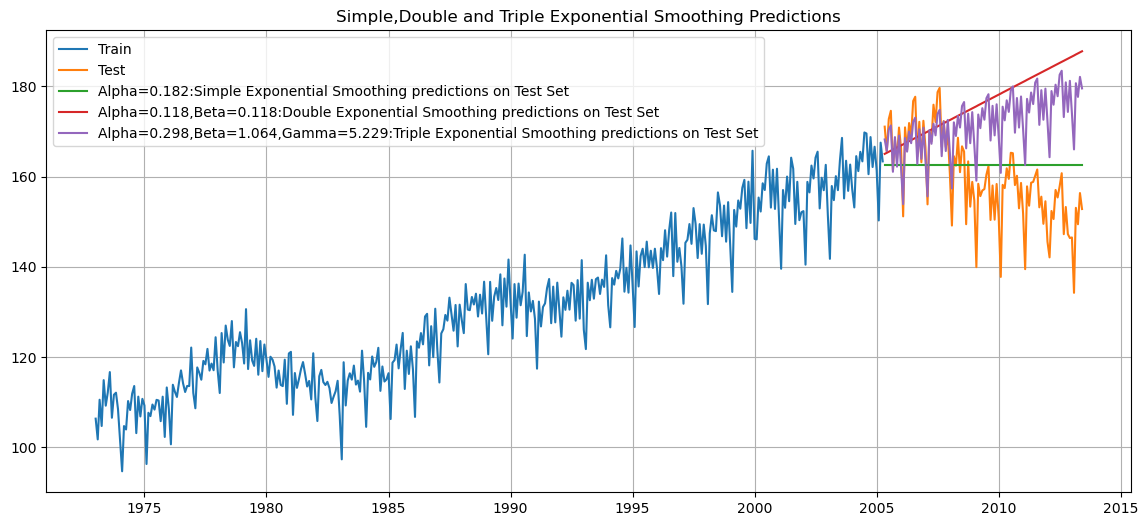

In [40]:
plt.figure(figsize=(14,6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.182:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.118,Beta=0.118:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.298,Beta=1.064,Gamma=5.229:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions'); plt.show()

In [41]:
print('TES_am RMSE:',mean_squared_error(test.values,TES_predict.values,squared=False))

TES_am RMSE: 16.39925964038238


In [42]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict.values,squared=False)]}
                           ,index=['Alpha=0.298,Beta=1.064,Gamma=5.229:TES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
NaiveModel,10.159476
SimpleAverage,29.944898
2pointTrailingMovingAverage,4.276399
4pointTrailingMovingAverage,5.381189
6pointTrailingMovingAverage,6.096596
9pointTrailingMovingAverage,6.804840
"Alpha=0.182,SES",9.922371
"Alpha=0.118,Beta=0.118:DES",22.372482
"Alpha=0.298,Beta=1.064,Gamma=5.229:TES",16.399260


# Holt-Winters - ETS(A, A, M) - Holt Winter's linear method

In [43]:
# Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(train,trend='add',seasonal='multiplicative')
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.30549484989972153, 'smoothing_slope': 6.143836113182686e-15, 'smoothing_seasonal': 0.0, 'damping_slope': nan, 'initial_level': 128.40706126769686, 'initial_slope': 0.17033387411876963, 'initial_seasons': array([0.8281212 , 0.77788501, 0.86007235, 0.83829894, 0.86293159,
       0.85020847, 0.87048989, 0.88006751, 0.82420388, 0.86544117,
       0.82947096, 0.872214  ]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [44]:
# Forecasting using this model for the duration of the test set
TES_predict_am =  model_TES_am.forecast(len(test))
TES_predict_am

2005-05-01    168.106701
2005-06-01    165.772945
2005-07-01    169.875673
2005-08-01    171.894646
2005-09-01    161.123760
                 ...    
2013-02-01    163.861390
2013-03-01    181.320644
2013-04-01    176.873160
2013-05-01    182.217403
2013-06-01    179.675598
Freq: MS, Length: 98, dtype: float64

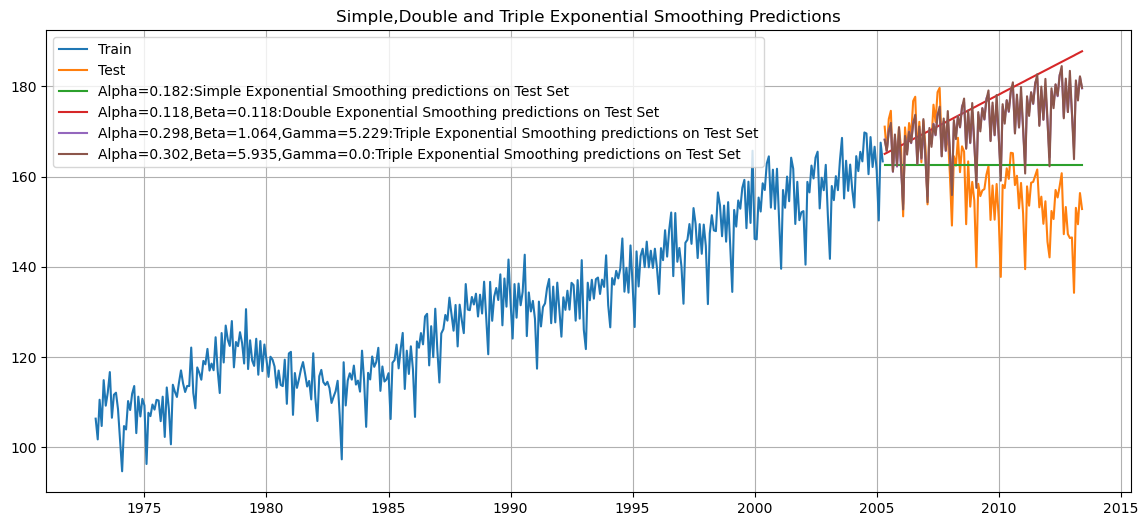

In [45]:
plt.figure(figsize=(14,6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.182:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.118,Beta=0.118:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.298,Beta=1.064,Gamma=5.229:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_am, label='Alpha=0.302,Beta=5.935,Gamma=0.0:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions'); plt.show()

In [46]:
print('TES_am RMSE:',mean_squared_error(test.values,TES_predict_am.values,squared=False))

TES_am RMSE: 16.51259659138124


In [47]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict_am.values,squared=False)]}
                           ,index=['Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
NaiveModel,10.159476
SimpleAverage,29.944898
2pointTrailingMovingAverage,4.276399
4pointTrailingMovingAverage,5.381189
6pointTrailingMovingAverage,6.096596
9pointTrailingMovingAverage,6.804840
"Alpha=0.182,SES",9.922371
"Alpha=0.118,Beta=0.118:DES",22.372482
"Alpha=0.298,Beta=1.064,Gamma=5.229:TES",16.399260
"Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES",16.512597


# SES - ETS(A, N, N) - Simple Exponential Smoothing with additive errors on Log values

In [51]:
model_SES = SimpleExpSmoothing(np.log(train))
model_SES_autofit = model_SES.fit(optimized=True)
model_SES_autofit.params

{'smoothing_level': 0.1809927274491827,
 'smoothing_slope': nan,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 4.680125308583361,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [52]:
SES_predict = model_SES_autofit.forecast(steps=len(test))
SES_predict

2005-05-01    5.091121
2005-06-01    5.091121
2005-07-01    5.091121
2005-08-01    5.091121
2005-09-01    5.091121
                ...   
2013-02-01    5.091121
2013-03-01    5.091121
2013-04-01    5.091121
2013-05-01    5.091121
2013-06-01    5.091121
Freq: MS, Length: 98, dtype: float64

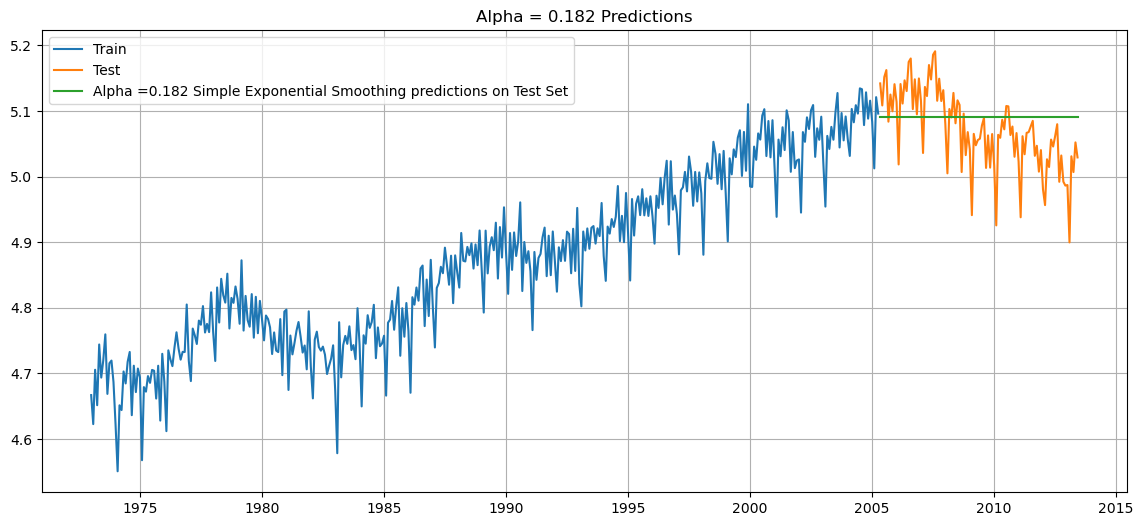

In [54]:
plt.figure(figsize=(14,6))
plt.plot(np.log(train), label='Train')
plt.plot(np.log(test), label='Test')

plt.plot(SES_predict, label='Alpha =0.182 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.182 Predictions'); plt.show()

In [32]:
def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [55]:
print('SES RMSE:',mean_squared_error(np.log(test).values,SES_predict.values,squared=False))
print('SES RMSE (calculated using statsmodels):',em.rmse(np.log(test).values,SES_predict.values)[0])

SES RMSE: 0.06295358349603883
SES RMSE (calculated using statsmodels): 0.06295358349603883


In [56]:
resultsDf_tmp = pd.DataFrame({'Test RMSE': [em.rmse(np.log(test).values,SES_predict.values)[0]]},index=['Alpha=0.182,SES, Log'])
resultsDf = pd.concat([resultsDf, resultsDf_tmp])
resultsDf

,Test RMSE
NaiveModel,10.159476
SimpleAverage,29.944898
2pointTrailingMovingAverage,4.276399
4pointTrailingMovingAverage,5.381189
6pointTrailingMovingAverage,6.096596
9pointTrailingMovingAverage,6.804840
"Alpha=0.182,SES",9.922371
"Alpha=0.118,Beta=0.118:DES",22.372482
"Alpha=0.298,Beta=1.064,Gamma=5.229:TES",16.399260
"Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES",16.512597
